# Support Vector Machines for classification

**Alipio Jorge**

May 2021

## Finding a decision boundary

Back to a standard **classification** problem

  - Given a set of points of two different classes we want to find a **good boundary**

This is the artificial data we are going to use for our illustrative examples


In [16]:
import numpy as np
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
X = X[0:100,0:2]
y = y[0:100]

Xori=X
yori=y

# move one point away from the border to illustrate a case with good separation
X[X[:,0]==4.5,:]=np.array([4.5,3.5])

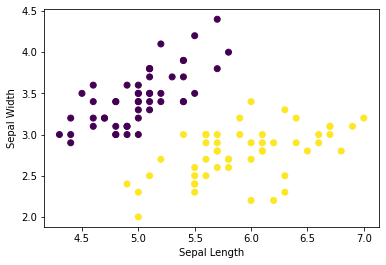

In [17]:
import matplotlib.pyplot as plt

# Plot the data and the classification with the decision boundary.
plt.scatter(X[:,0],X[:,1],c=y)

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.show()


## Finding a decision boundary

- Many good **linear** boundaries can separate the two classes
  - Which one is the best?
  

- Logistic regression gives **one answer**
    - **Assumes** that $\Pr(class)$ under the parameters follows a logistic law
    - Uses **maximum likelihood** to infer the parameters

- LDA gives a slightly different answer, in general
    - Different assumptions


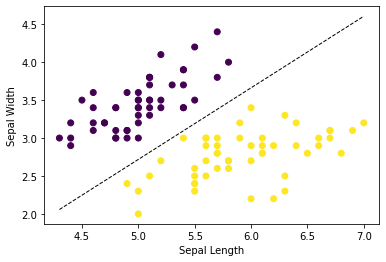

(array([2.96717112]), array([-3.14496181]), -6.28664702739484)

In [53]:
from sklearn.linear_model import LogisticRegression


clf = LogisticRegression(random_state=0).fit(X, y)

# Retrieve the model parameters.
b = clf.intercept_[0]
w1, w2 = clf.coef_.T

# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

# prepare the points for drawing the linear boundary
xmin, xmax = min(X[:,0]), max(X[:,0])
xd = np.array([xmin, xmax])
yd = m*xd + c

# replot, but now with the boundary
plt.scatter(X[:,0],X[:,1],c=y)

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.show()

w1, w2, b

# Finding a decision boundary

- Many good boundaries can separate the two classes
  - Which one is the best?
    - Depends on the assumptions

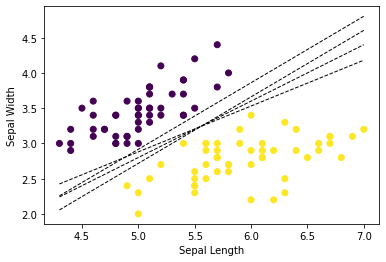

In [48]:
# Calculate the intercept and gradient of the decision boundary.

# possible linear boundaries
c,m = -2,.9434
yd1 = m*xd + c
c,m = -1.2,.8
yd2 = m*xd + c
c,m = -0.37,.65
yd3 = m*xd + c
c,m = -1.8,.9434
yd4 = m*xd + c


# replot, but now with the boundary
plt.scatter(X[:,0],X[:,1],c=y)

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.plot(xd, yd1, 'k', lw=1, ls='--')
plt.plot(xd, yd2, 'k', lw=1, ls='--')
plt.plot(xd, yd3, 'k', lw=1, ls='--')
plt.plot(xd, yd4, 'k', lw=1, ls='--')
plt.show()

#c,m -1.99895814]), array([0.94346809

# Finding a decision boundary

- Our training data are pairs $(x_i, y_i)$
 * $x_i \in \mathbb{R}^p$
 * $y_i \in \{1,-1\}$


- In this case the classes are **separable**


- One **possible criterium** is
 * Find the boundary that is **most distant** to the **nearest points**


# Finding a decision boundary

- A linear boundary in $\mathbb{R}^p$ is an **hyperplane** defined by 
  $$h(x) = \beta_0 + \beta_1 x_1 + \ldots + \beta_p x_p = 0$$


- The **signed distance** between a point $x$ and the hyperplane is equal to $h(x)$, if $\|\beta\|=1$


- Given a boundary, we have a **classifier**
    * $G(x) = sign[x^T \beta + \beta_0]$


- Which is the **best boundary** / **best classifier**?



# Finding a decision boundary

- If the classes are **linearly separable** as in the example
 * We can find a boundary such that $y_i h(x_i) > 0 ~~\forall i$
 * I.e., all points are on the right side of the boundary
     - If $y_i = 1$, then $x_i$ should have a **positive distance** to the boundary $h$
     - If $y_i = -1$, then $x_i$ should have a **negative distance** to the boundary $h$


In [69]:
# using the linear boundary from logistic regression

def h(x,beta,beta0):
    return beta0+sum(x*beta)

# hyperplane, boundary
beta=np.array([2.97,-3.14])
beta0=-6.29

# purple point
x_purple=np.array([5,3])

# yellow point
x_yellow=np.array([5,2])


h(x_purple,beta,beta0), h(x_yellow,beta,beta0)

(-0.8599999999999985, 2.2800000000000002)

In [70]:
# we can make the coefficients sum to 1
# and obtain the actual signed distance

sumcoef = sum(beta)+beta0

beta_norm = beta/sumcoef
beta0_norm = beta0/sumcoef

h(x_purple,beta_norm,beta0_norm), h(x_yellow,beta_norm,beta0_norm)


(0.13312693498451977, -0.3529411764705884)

# Finding a decision boundary

- We can now look for the boundary that maximizes **distance to the nearest point** of any class


- The maximal value $M$ such that $y_i h(x_i) \ge M ~~\forall i$ is the **margin**
 * we want the boundary that **maximizes** $M$
 * this gives us the largest **safety margin** with respect to the data


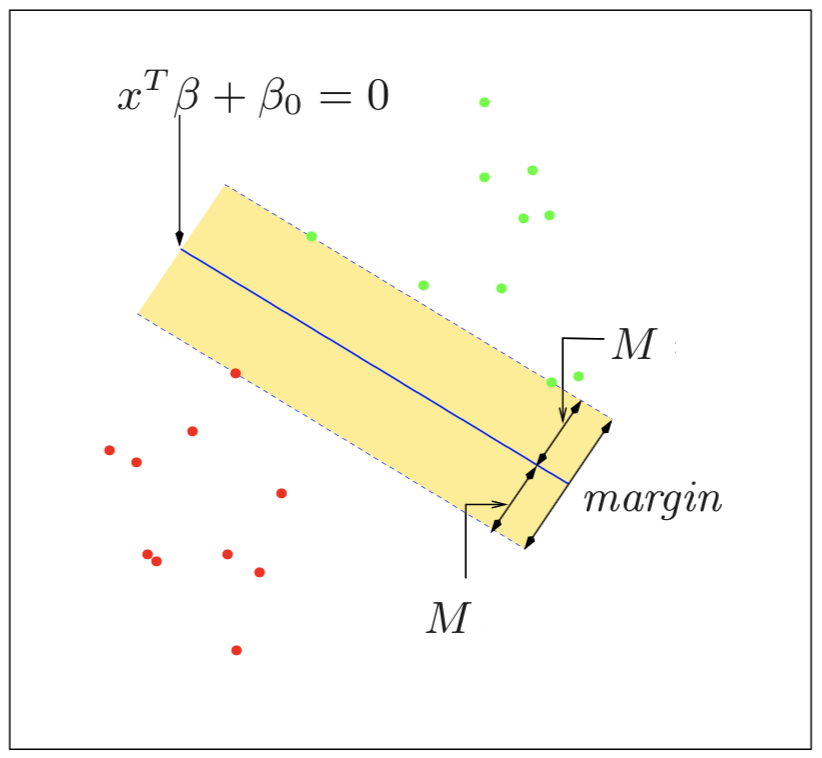

In [72]:
from IPython.display import Image
Image("imagens/10n-SVM-hardmargin-fig12.1.png")

# Finding a decision boundary

- Mathematically the learning problem is stated as
$$ \max_{\beta, \beta_0, \|\beta\|=1} M $$
$$\textrm{subject to} ~~~y_i(x_i^T\beta + \beta_0) \ge M $$


- A solution $\beta, \beta_0$ to this problem gives us a **maximal margin classifier**


- This method:
    - Solutions are different from LDA or Logistic Regression
    - **Assumes** that points close to the boundary are the ones that define it
        - These points are the **support vectors**
    - But also assumes **separability** (not realistic)



In [74]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=10000)
model.fit(X, y);

In [93]:
# from VanDerPlas book

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=120, edgecolors='red', facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

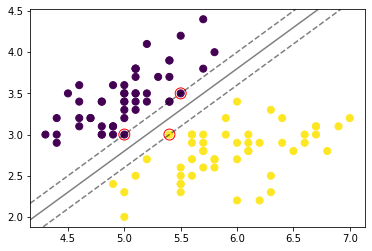

In [94]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plot_svc_decision_function(model);

# Softening the Decision Boundary

- If classes **overlap** there is no boundary that separates them
    - classes are not separable


- To deal with that we can allow some amount of 
    - **misclassification** 
    - **margin intrusion**

- And produce a **soft boundary**


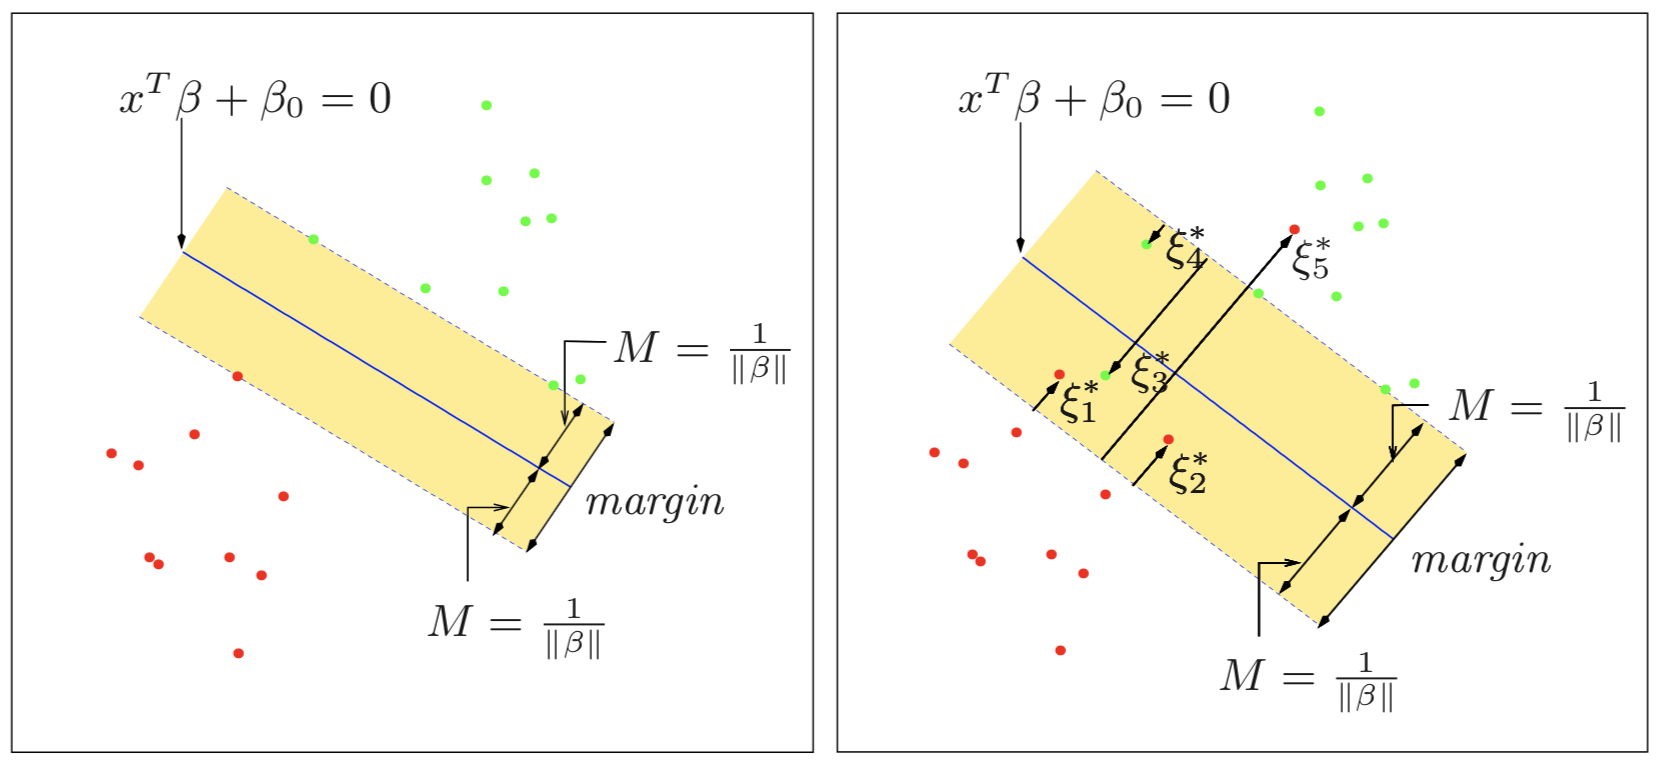

In [95]:
from IPython.display import Image
Image("imagens/10n-SVM-margin-fig12.1-ESL.png")

# Softening the Decision Boundary

- The learning problem can be **softened** as
$$ \max_{\beta, \beta_0, \|\beta\|=1} M $$
$$\textrm{subject to} ~~~y_i(x_i^T\beta + \beta_0) \ge M (1-\xi_i) $$
$$ \xi_i \ge 0~, ~~~\sum_i \xi_i \le Cost_{max}$$


- This leads to the standard **Support Vector Classifier**
 * The $\xi_i$ are **exceptions** to the margin
 * The constant $Cost_{max}$ is like a budget for the misclassification cost


# Support Vector Classifier

- The problem can also be formulated as follows:
  * We make $M=1/\|\beta\|$ 
  * drop $\|\beta\| = 1$


- And obtain:
$$ \min \|\beta\|$$
$$\textrm{subject to} ~~y_i (x_i^T \beta + \beta_0) \ge   1 - \xi_i ~~\forall i $$
$$\xi_i \ge 0, ~~\sum\xi_i \le Cost_{max}$$


- Notes
    - Decision boundary **depends only** on 
        - Misclassified points 
        - Correctly classified points inside the margin
    - These points are called the **support vectors**


# Support Vector Classifier

- Computationally, it is convenient to reformulate the problem:
    - **Squaring** gives a better derivative
    - Constraining the magnitude of the $\xi_i$ with **regularization**
        - $C$ is the regularization parameter
    
$$ \min_{\beta,\beta_0}  \frac{1}{2}\|\beta\|^2 + C \sum\xi_i$$
$$\textrm{subject to} ~~y_i (x_i^T \beta + \beta_0) \ge   1 - \xi_i ~~\forall i $$
$$\xi_i \ge 0$$


- This formulation is known as **C-SVC**
    - If $C$ is zero there are no constraints on the $\xi_i$
    - The larger the $C$ the more we minimize the $\xi_i$


- This can be attacked as an optimization problem using **quadratic programming**
     - The solution has the form 
    $$\widehat{\beta} = \sum_{i=1}^N \alpha_i y_i x_i$$
     -$\alpha_i$ are non-negative and are **non zero** only for the support vectors



# Support Vector Classifier > Example

- An artificial example with non-separable classes


- Large $C$ has **fewer** support vectors
    - If $C$ is large, minimization focuses on $\xi_i$
    - $\beta_i$ tend to be larger
    - The **margin is smaller** 
    

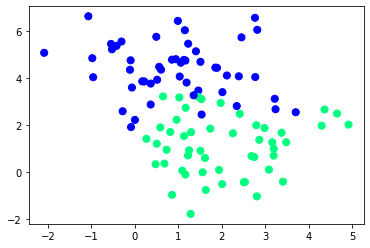

In [114]:
# from van der Plas, an example without a clear separation
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter');

C = 20.0 , margin = 0.7120665238773749
C = 0.01 , margin = 1.9641905246766305


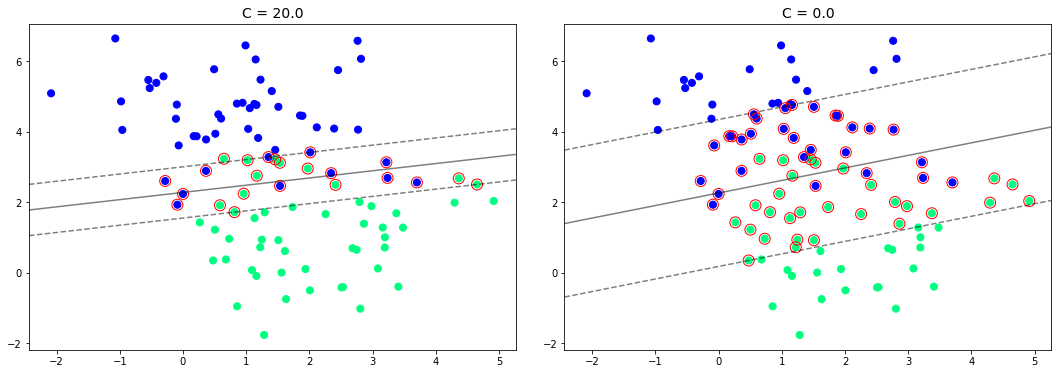

In [243]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [20.0, 0.01]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
    plot_svc_decision_function(model, axi)
    axi.set_title('C = {0:.1f}'.format(C), size=14)
    print("C =",C,", margin =",1 / np.sqrt(np.sum(model.coef_ ** 2)))

# SVM: non-linear boundaries

- What if the data is **not linearly separable**?


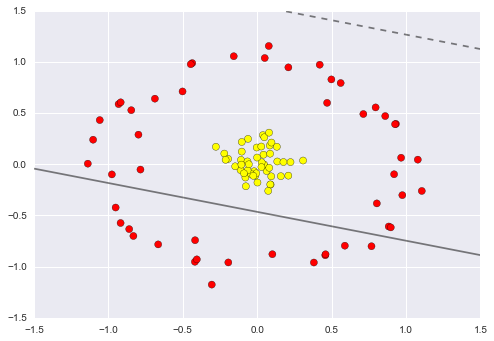

In [138]:
from IPython.display import Image
Image("imagens/SVM-nolinear-book.png")

# SVM: non-linear boundaries

- We can project the **original space** 
  - into an **expanded space**
  - where the data is **linearly separable**


- This is done using the **Kernel trick**
    - a long story
    
    
- In the example below, the points are **projected** on the surface of a sphere
    - SVM does this by generalizing the algorithm we saw

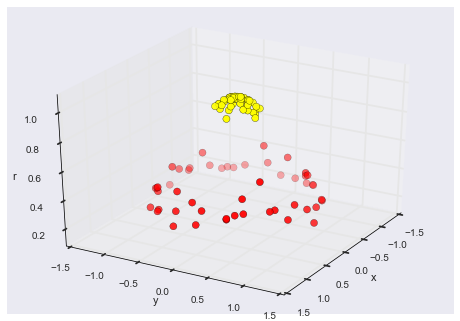

In [139]:
from IPython.display import Image
Image("imagens/SVM-expanded-book.png")

# SVM: kernels

- **How** do we expand the original space in a **feasible way**?


- It can be shown that the vector $\beta$ can be **defined** using the support vectors
    $$\beta = \sum_{i=1}^N \alpha_i y_i x_i$$
  -  $\alpha_i$ are non-negative and are **non zero** only for the support vectors


- So, $f(x)$, the **classifier**, is 
$$ G(x) = sign[\sum_{i=1}^N \alpha_i y_i x_i x  + \beta_0]$$


# SVM: kernels

- Now suppose we **expand** the coordinates $x$ into a set of coordinates $h(x)$
  - e.g.: original space is $(a,b)$ and expanded space is $h(a,b)=(a,b,a^2,b^2,ab)$
  - a linear boundary in the expanded space is non-linear in the original


- So we can **generalize** $G(x)$ to the expanded coordinates
$$ G(x) = sign[\sum_{i=1}^N \alpha_i y_i \langle h(x_i),h(x) \rangle + \beta_0]$$

# SVM: the kernel trick

- The inner product of the transformed vectors is given by a **kernel** function

  $$ K(x,x') = \langle h(x), h(x') \rangle $$
  

- So that

  $$ G(x) = sign[\sum_{i=1}^N \alpha_i y_i K(x_i,x) + \beta_0]$$

- The kernel function **transforms** the original space into an expanded one
   - Given the kernel we do not have to make the basis functions $h$ explicit
   - All we need is the **inner product** in the transformed space
   - So, whatever happens there, stays there, **except** the inner product
   - The kernel function is the **gateway** to the transformed space


- So far, we worked with the **linear kernel** (the inner product)
$$ K(x_i, x'_{i}) = \sum_{j=1}^p x_{ij} x'_{ij} $$


# SVM: popular kernels

- So, we can define **kernels** that generalize the inner product
    - Actually, we only have **choose** studied kernels
    - A kernel function must satisfy some conditions
        - The easy one is that $K(x,x')$ should be **symetric**


- Popular kernels 
  - the **linear** kernel: $K(x,x') = \sum_{j=1}^p x_{j} x'_{j}  + c$
  - the **radial basis**: $K(x, x') = \exp(-\gamma\|x - x'\|^2)$
  - the **polynomial**: $K(x, x') = (1 + \langle x, x' \rangle )^d = (1 + \sum_{j}{x_j.x'_j})^d$


# SVM: Radial basis example

- Let us look at the example with concentric circles
    - The linear kernel gives poor results

#SV = 100


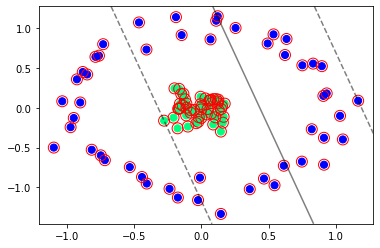

In [201]:
# from van der Plas, an example with a non-linear kernel

from sklearn.datasets import make_circles

X, y = make_circles(100, factor=.1, noise=.1, random_state=0)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(clf, plot_support=True)
print("#SV =",len(clf.support_vectors_))

# SVM: model complexity

- The number of support vectors is a 'measure' of the **complexity** of the model
    - The **fewer** the better (typically)
    - Less support vectors means **more compression**
    - This means potentially better generalization


# SVM: Radial basis example

- We now try a different kernel
    - The **radial basis**


- Each point $x$ is associated to the class that has more points near it

#SV = 12


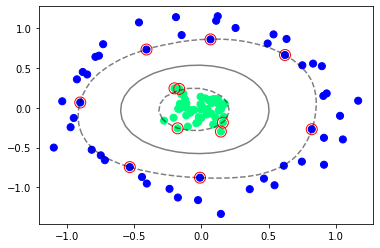

In [204]:
# All it takes is to change the kernel

clf = SVC(kernel='rbf', C=1, gamma='scale').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(clf, plot_support=True)
print("#SV =",len(clf.support_vectors_))

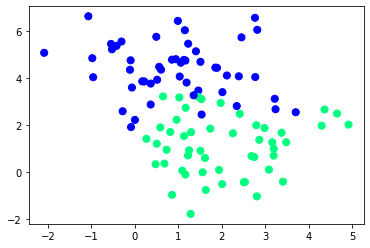

In [207]:
# from van der Plas, an example without a clear separation
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter');

# SVM: Polynomial kernel

- The polynomial kernel can produce non-linear boundaries
    - Try `rbf` as well

#SV = 16


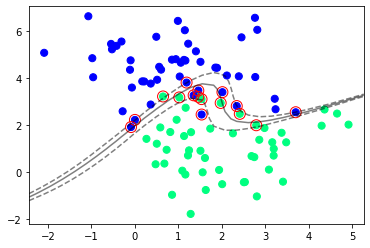

In [239]:
# we can also try a different kernel on this data

clf = SVC(kernel='poly',gamma=2,C=1).fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(clf, plot_support=True)
print("#SV =",len(clf.support_vectors_))

# Support Vector Machines

- Can we **see** the transformed space from the kernel?
    - In very simple cases, yes
    - But this is **never** needed, or useful
    - This is just to satisfy our curiosity **now**
    
    
- Looking into the **polynomial** kernel

  $$ K(x, x') = (1 + \langle x, x' \rangle )^d = (1 + \sum_{j}{x_j.x'_j})^d$$

  - If we have a 2d space with coordinates $a, b$, and $d=2$
  
    $$K((a,b), (a',b')) = (1 + aa'+ bb')^2 = (1+a^2 a'^2+b^2b'^2 + 2aa' + 2 bb' + 2aa'bb')$$
    
  - The feature mapping that has this **inner product** is  
  
    $$\phi(x) = (1, \sqrt{2}a, \sqrt{2}b, \sqrt{2}ab, a^2, b^2)$$
    
  - Exercise: check this by calculating 
  
    $$<\phi(x),\phi(x')>$$
    
- This **transformed** space has 5 dimensions
    - Higher $d$ gives polynomially more dimensions
    - RBF space has **infinite** dimensions


# SVM: some thoughts

- **Advantages**
  - They depend only on support vectors means  they are very compact 
  - Prediction is very fast
  - Because they are affected only by points near the margin, they work well with high-dimensional data
  - Kernel methods are very versatile, able to adapt to many types of data.
  
  
- **Disadvantages**
  - Complexity is $O(N^3)$ at worst, or $O(N^2)$ for efficient implementations
    - For large data sets, this can be prohibitive
  - The results are strongly dependent on a suitable choice for the softening parameter C. 
    - Must be carefully chosen via cross-validation
  - Results do not have a direct probabilistic interpretation
    - There are methods for doing this



# References

**Data Mining Concepts and Techniques**
Han, Kamber & Pei,  Morgan

**Python Data Science Handbook**
Van der Plas

**The Elements of Statistical Learning**
Trevor Hastie, Robert Tibshirani, Jerome Friedman
Springer. (mostly chapter 12, also chapter 5)

**An Introduction to Statistical Learning**
Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani
Springer (very neat description of SVM but skipping some parts. Nice R examples)

**Polynomial kernel**
From Wikipedia, the free encyclopedia (note: use wikipedia at your own risk - references found in wikipedia articles can be useful)

**Machine Learning Software: Design and Practical Use**
Chih-Jen Lin
National Taiwan University and eBay Research Labs, 2012
https://www.csie.ntu.edu.tw/~cjlin/talks/mlss_kyoto.pdf

**Lecture 3: SVM dual, kernels and regression**
(slides) A. Zisserman,
http://www.robots.ox.ac.uk/~az/lectures/ml/lect3.pdf

**LIBSVM: A Library for Support Vector Machines**
Chih-Chung Chang and Chih-Jen Lin
https://www.csie.ntu.edu.tw/~cjlin/papers/libsvm.pdf

**Learning from data**, Yaser Abu-Mostafa, Caltech U.
https://work.caltech.edu/lectures.html